<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Time_series_of_Electric_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Analysis and Prediction
* predicting the consumption of electricity in the coming future
* Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as auto-correlation, trend or seasonal variation) that should be accounted for.

https://www.kaggle.com/datasets/kandij/electric-production

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
# set plot size
rcParams['figure.figsize'] = 10, 6
# read data
folder_path = '/content/drive/MyDrive/ETE_projects/time_series/'
df = pd.read_csv(folder_path+ 'Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
def visualization(data):
  print(data.info())
  print('-------------------------------------------------------')
  print(data.shape)
  print('-------------------------------------------------------')
  print(data.isnull().sum())

visualization(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None
-------------------------------------------------------
(397, 2)
-------------------------------------------------------
DATE          0
IPG2211A2N    0
dtype: int64


In [56]:
df['DATE'] = pd.to_datetime(df.DATE)
# df.reset_index(inplace = True)
df = df.set_index(df.DATE)
df.drop('DATE', axis=1, inplace=True)
print(df.dtypes)
df.head()

IPG2211A2N    float64
dtype: object


,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.tail()

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


### Visualize the Data

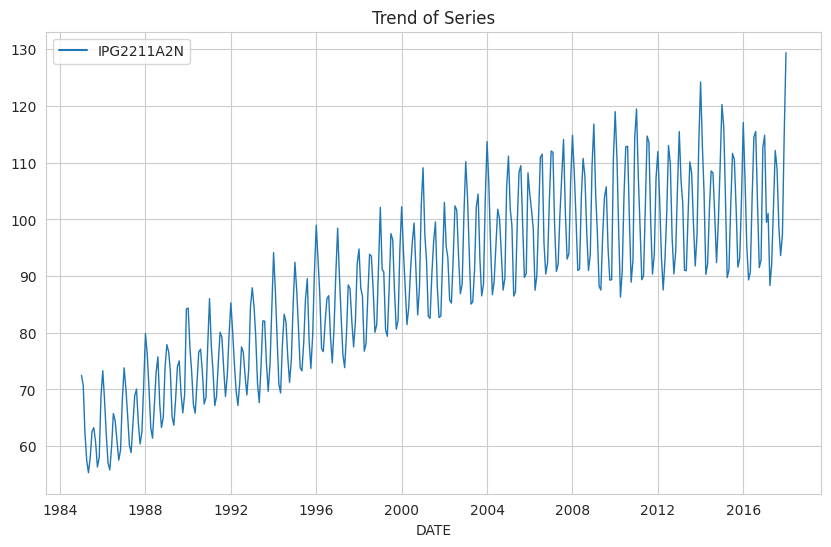

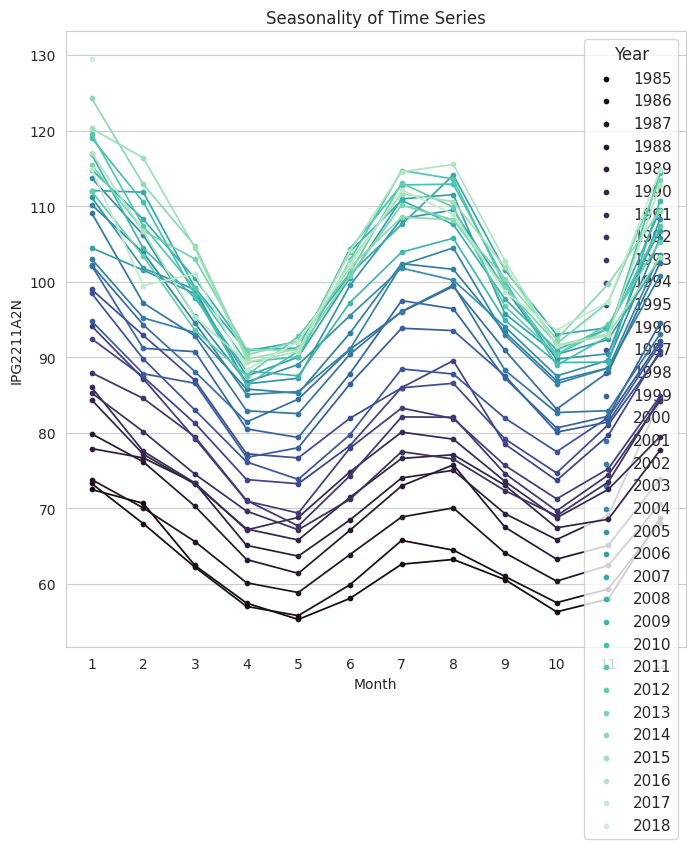

In [60]:
## Time series Characteristics

def characteristics(data, x, y, title):
  ax = sns.lineplot(data = data, lw=1)
  ax.lines[0].set_linestyle('solid')
  ax.set_title(title)

  df_temp = data.copy()
  df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
  df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
  # Stacked Line Plot
  plt.figure(figsize=(8,8))
  plt.title('Seasonality of Time Series')
  sns.set(style="ticks", rc={"lines.linewidth": 0.7})
  sns.pointplot(x='Month', y= 'IPG2211A2N', hue='Year', data = df_temp,palette='mako', linestyles='-' )

characteristics(df, 'DATE', 'IPG2211A2N','Trend of Series')

<pre>
- We observe upward trend the graph.
- There is also slight increase in the variance over time.
- We also observe that the data is seasonal and there is dip during April-May(4-5) and rise during July-August(7-8) and November- December(11-12)

In [ ]:
len(df)*70/100

277.9

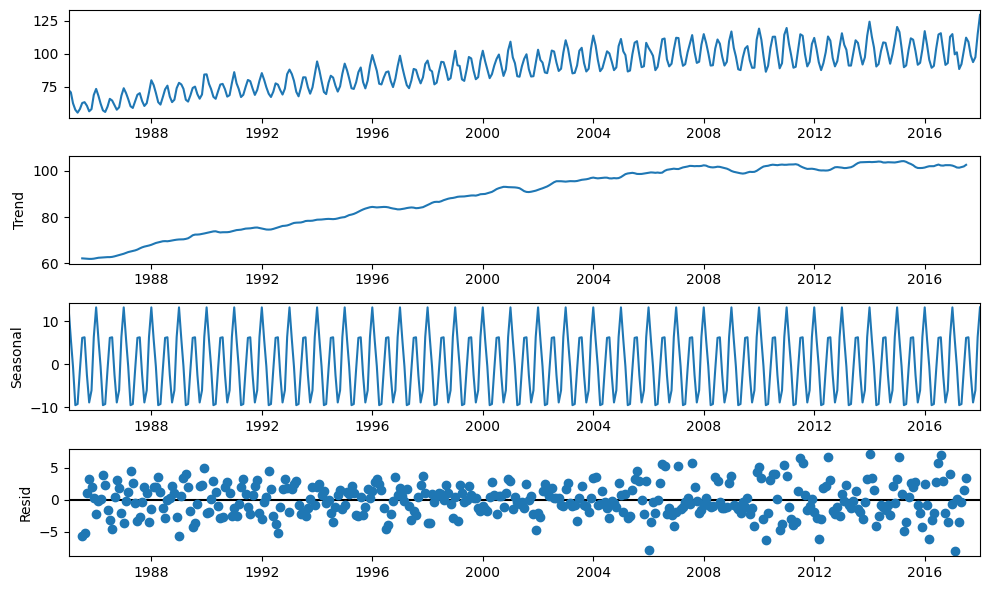

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()

<pre>
Let's now use the decomposition technique to
deconstruct the time series data into several component like trend and seasonality for
visualization of time series characteristics.

We have used 'additive' model
 because it is quick to develop, fast to
 train, and provide interpretable patterns.
</pre>

### Check for Stationarity

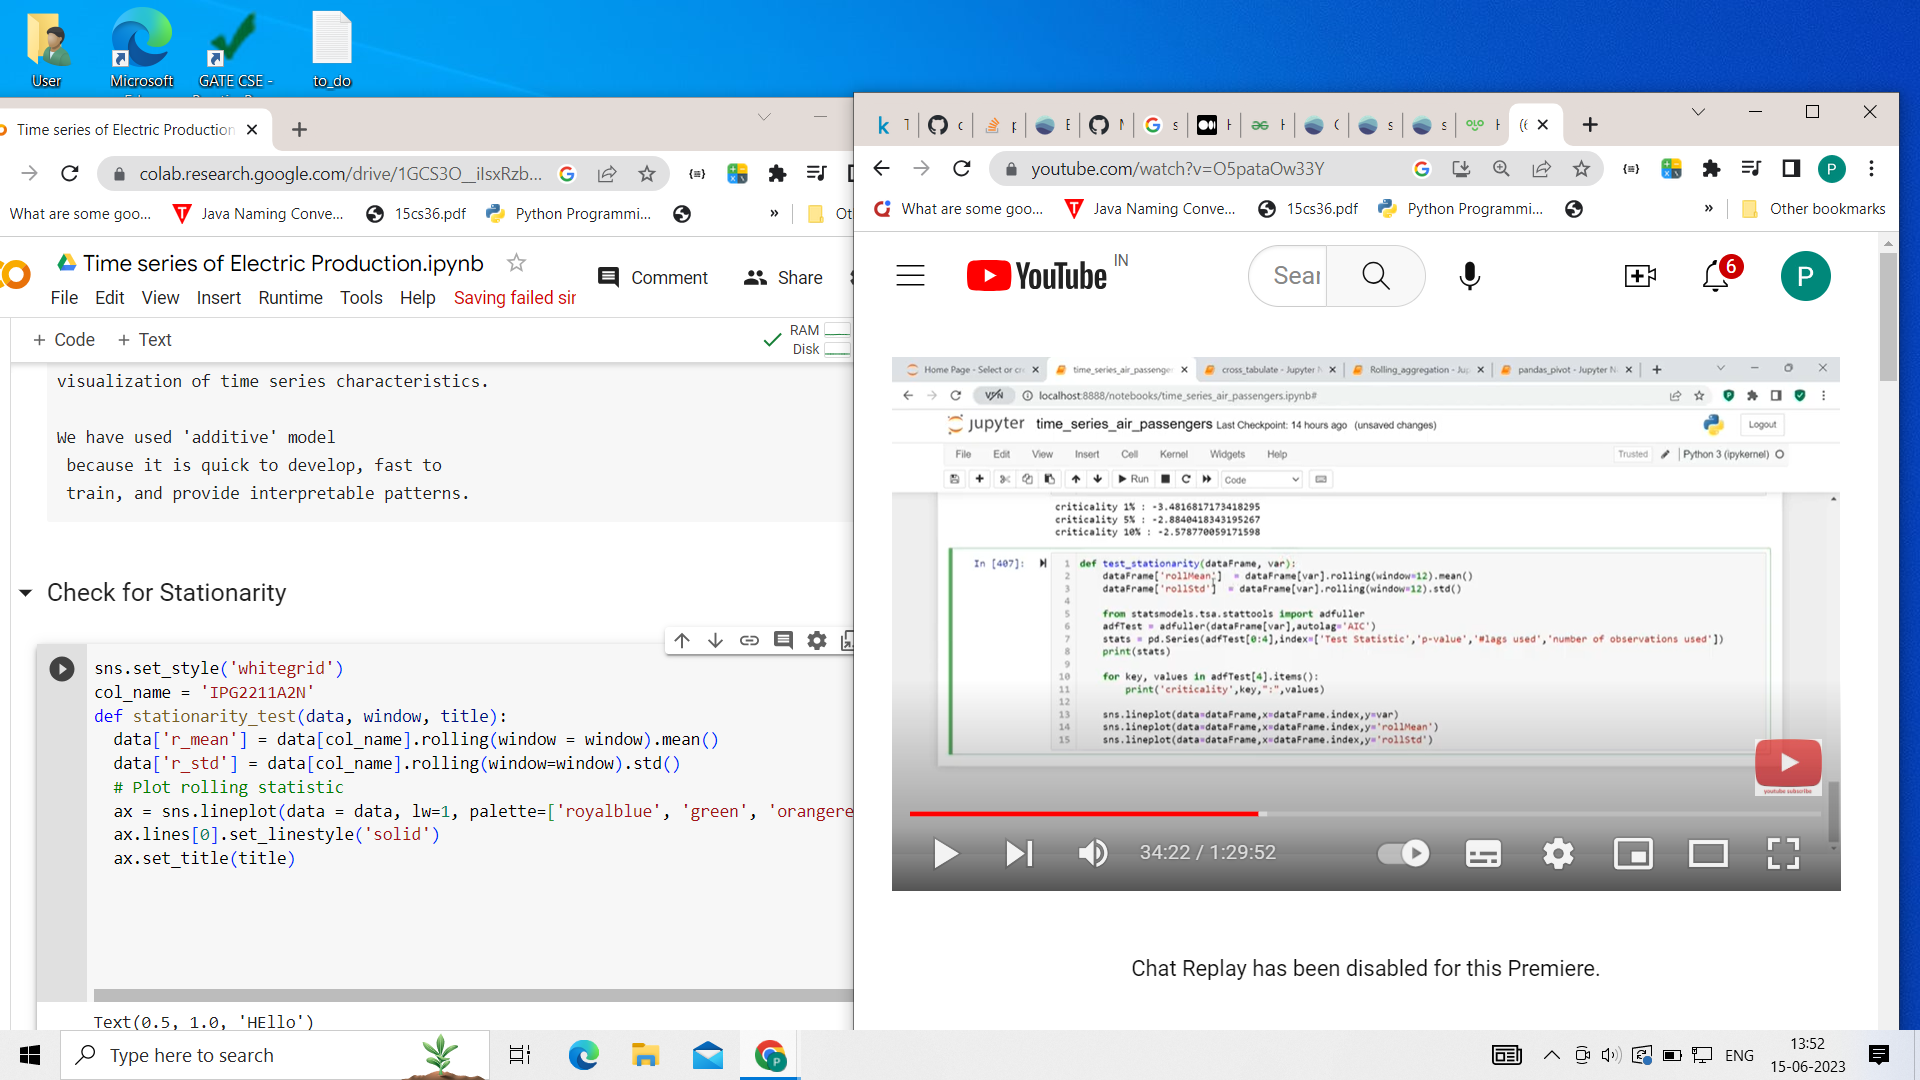

In [75]:
sns.set_style('whitegrid')
col = 'IPG2211A2N'
def stationarity_test(data, window, title, col_name):
  data['r_mean'] = data[col_name].rolling(window = window).mean()
  data['r_std'] = data[col_name].rolling(window=window).std()
  # Plot rolling statistic
  ax = sns.lineplot(data = data, lw=1, palette=['navy', 'darkgreen', 'red'])
  ax.lines[0].set_linestyle('solid')
  ax.set_title(title)
  # Dickey Fuller test
  df_test = adfuller(data[col_name])
  df_output = pd.Series(df_test[0:4], index=['Test Statistic',
                                             'p-value',
                                             'Lags used for t-statistic',
                                             'No_of_observation_used'])
  for key, value in df_test[4].items():
    df_output['Critical value(%s)'%key] = value
  print(df_output)

Test Statistic                -2.256990
p-value                        0.186215
Lags used for t-statistic     15.000000
No_of_observation_used       381.000000
Critical value(1%)            -3.447631
Critical value(5%)            -2.869156
Critical value(10%)           -2.570827
dtype: float64


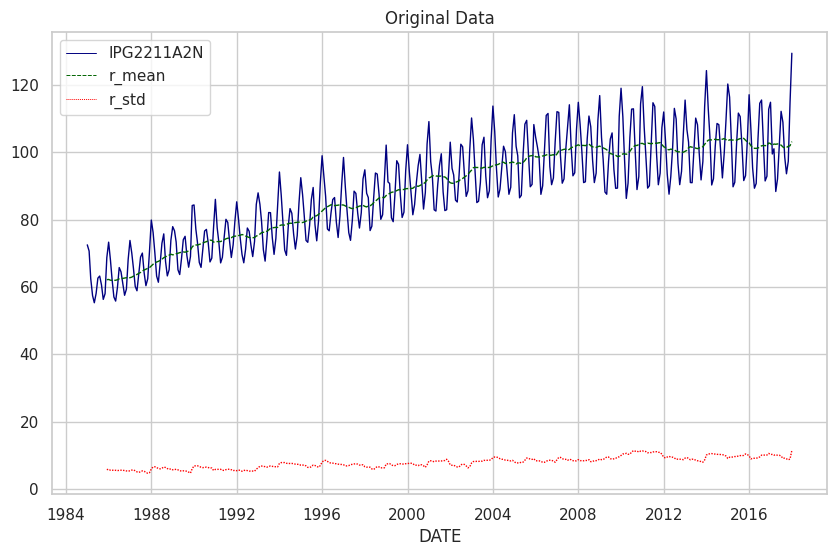

In [76]:
stationarity_test(df, 12, 'Original Data',col)

In [ ]:
# def rolling_mean_std(data, window):
#   rolling_mean = data.rolling(window = window).mean()
#   rolling_std = data.rolling(window=window).std()
#   return rolling_mean, rolling_std

# def plot_rolling_static(data, r_mean, r_std, x, y, title):
#   plt.figure(figsize=(10,6))
#   plt.xlabel(x)
#   plt.ylabel(y)
#   plt.title(title)
#   plt.plot(data, color='blue', label = 'Original')
#   plt.plot(r_mean, color='green', label='Rolling Mean')
#   plt.plot(r_std, color='red', label='Rolling Std')
#   plt.legend()
#   plt.show()

# def Dickey_Fuller_test(data):
#   df_test = adfuller(data)
#   df_output = pd.Series(df_test[0:4], index=['Test Statistic',
#                                              'p-value',
#                                              'Lags used for t-statistic',
#                                              'No_of_observation_used'])
#   for key, value in df_test[4].items():
#     df_output['Critical value(%s)'%key] = value
#   print(df_output)

In [ ]:
# r_mean, r_std = rolling_mean_std(df, 12)
# plot_rolling_static(df, r_mean, r_std, 'Years', 'IPG2211A2N',
#                     'Stationary Test: Rolling Mean and Standard Deviation')
# Dickey_Fuller_test(df)

<pre>
<b>Rolling Statistics</b>:
Standard deviation has less variation but mean is increasing continuously.
<b>Critical Value  -2.256990 </b>: Critical value of the data
<b>p-value  0.186215</b>: Probability that null hypothesis will not be rejected.
<b>t-statistic_Lag 15.000000</b>: Number of lags used in regression to determine t-statistic. So there are no auto correlations going back to '0' periods here.
No_of_observation_used  381.000000 : Number of observations used in the analysis.

Critical value(1%)            -3.447631
Critical value(5%)            -2.869156
Critical value(10%)           -2.570827

T values corresponding to adfuller test.
Since critical value -2.25>-3.44,-2.86,-2.57 (t-values at 1%,5%and 10% confidence intervals), null hypothesis cannot be rejected.
So there is non stationarity in the data.
Also p-value of 0.18>0.05(if we take 5% significance level or 95% confidence interval), null hypothesis is accepted.
Hence data is non stationary (that means it has relation with time)
</pre>


Test Statistic              -6.993863e+00
p-value                      7.622057e-10
Lags used for t-statistic    1.400000e+01
No_of_observation_used       3.700000e+02
Critical value(1%)          -3.448148e+00
Critical value(5%)          -2.869383e+00
Critical value(10%)         -2.570948e+00
dtype: float64


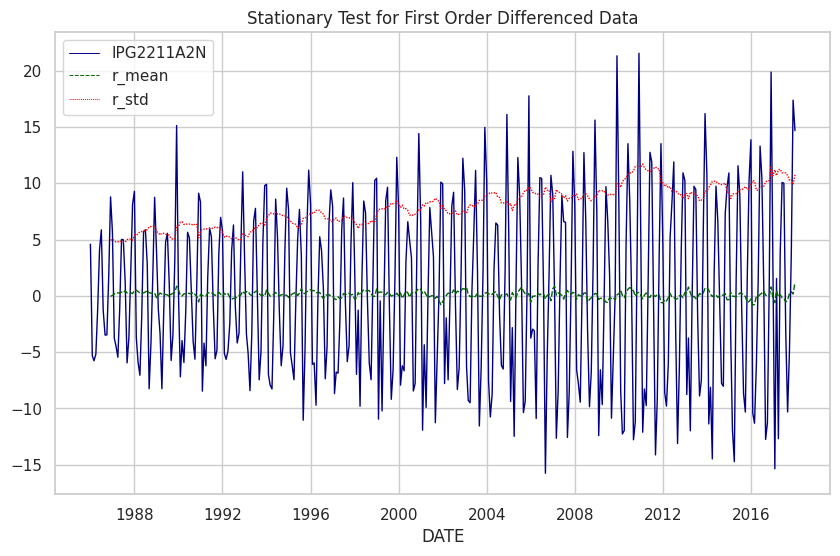

In [80]:
## Converting Non-Stationary Data into Stationary Data
# Differencing

def differencing(data,order):
  df_diff = data.diff(periods=order)
  # Data transformation may add na values
  df_diff.dropna(inplace=True)
  return df_diff

df_diff = differencing(df, 1)
stationarity_test(df_diff,12, 'Stationary Test for First Order Differenced Data',col )

* There is slight upward trend in standard deviation.
* Test statistic Value is less than (1%, 5%, 10%) critical.
* p-value is lesser than 0.05.
Thus it is stationary series.
* There is variance along with time

References:
https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting/notebook

https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

To be continued.

* Transformation and weighted Average

### Log Transformation

variation proportional to the levels log transformation.

Test Statistic                -3.145360
p-value                        0.023373
Lags used for t-statistic     15.000000
No_of_observation_used       381.000000
Critical value(1%)            -3.447631
Critical value(5%)            -2.869156
Critical value(10%)           -2.570827
dtype: float64


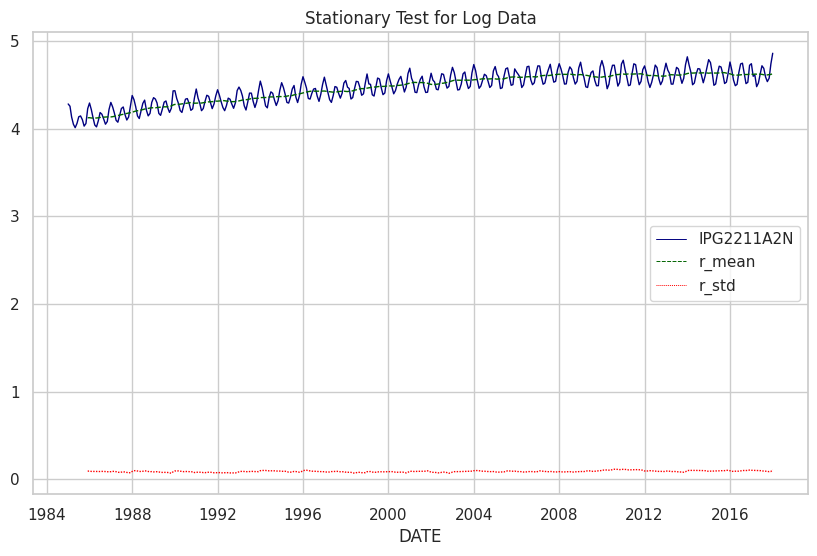

In [81]:
df_log = np.log(df)
stationarity_test(df_log,12, 'Stationary Test for Log Data',col )


In [ ]:
# Using transformation because there is variance.
# variation proportional to the levels. Hence use log transformation

Test Statistic              -6.654626e+00
p-value                      5.020330e-09
Lags used for t-statistic    1.400000e+01
No_of_observation_used       3.700000e+02
Critical value(1%)          -3.448148e+00
Critical value(5%)          -2.869383e+00
Critical value(10%)         -2.570948e+00
dtype: float64


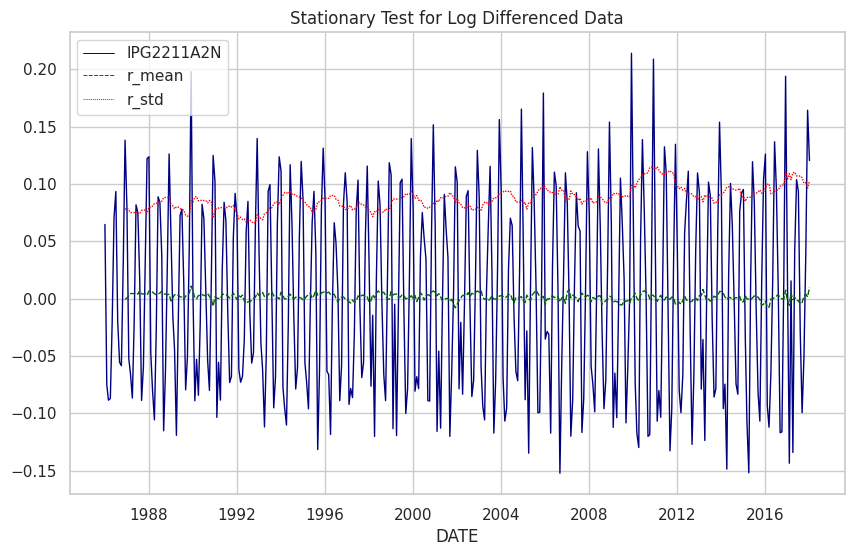

In [82]:
# First order differencing
df_log_diff = differencing(df_log, 1)
stationarity_test(df_log_diff,12,'Stationary Test for Log Differenced Data',col)

In [ ]:
# test statisitc < critical values  = stationary

### Forecasting

#### Auto Rergressive Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df_log_diff

In [ ]:
# acf to see if there is direct impact or indirect impact
# finding q :

In [84]:
df_log_diff

,IPG2211A2N,r_mean,r_std
DATE,,,
1986-01-01,0.064678,NaN,NaN
1986-02-01,-0.075323,NaN,NaN
1986-03-01,-0.088605,NaN,NaN
1986-04-01,-0.087082,NaN,NaN
1986-05-01,-0.021609,NaN,NaN
...,...,...,...
2017-09-01,-0.099489,-0.003434,0.105466
2017-10-01,-0.052051,0.001915,0.100747
2017-11-01,0.038991,0.003896,0.101265


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


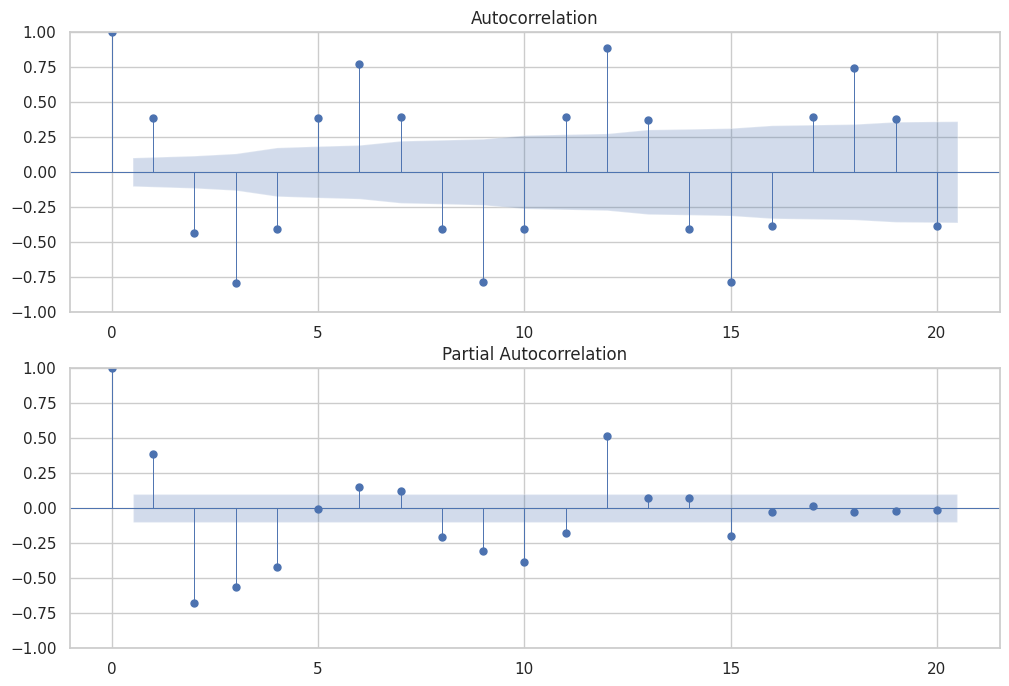

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log_diff[col].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log_diff[col].iloc[13:],lags=20,ax=ax2)

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

In [ ]:
# q=3(significant lag at 3 and not beyond) p=2,3, 4

In [89]:
# Finding PQD order for sarimax is the seasonal component
df_log_diff

,IPG2211A2N,r_mean,r_std
DATE,,,
1986-01-01,0.064678,NaN,NaN
1986-02-01,-0.075323,NaN,NaN
1986-03-01,-0.088605,NaN,NaN
1986-04-01,-0.087082,NaN,NaN
1986-05-01,-0.021609,NaN,NaN
...,...,...,...
2017-09-01,-0.099489,-0.003434,0.105466
2017-10-01,-0.052051,0.001915,0.100747
2017-11-01,0.038991,0.003896,0.101265


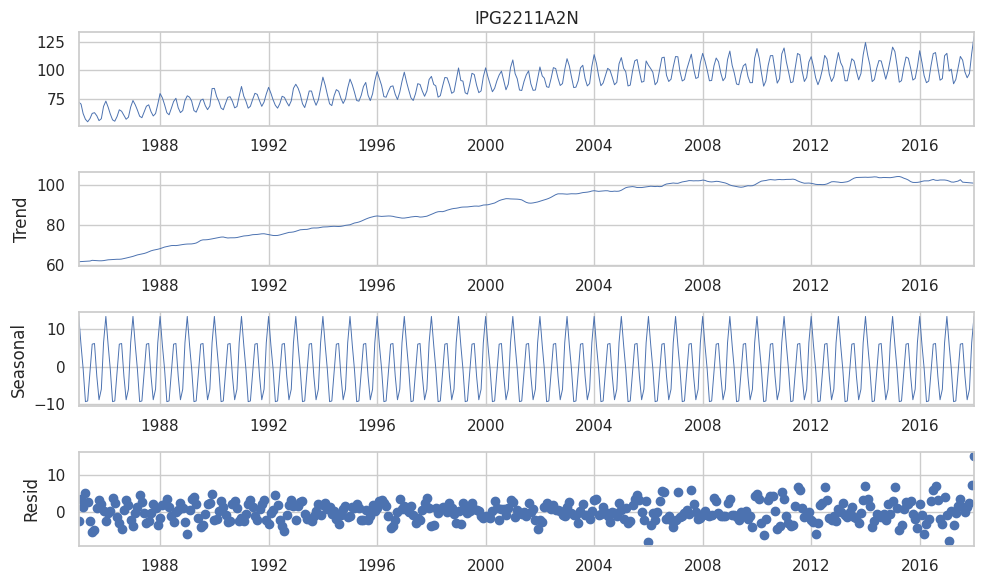

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[col], model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

* In order to evaluate the seasonal order, we must extract the seasonal component from the time series.
* In order to extract D, we have to check whether the seasonal componenet is stationary or not.

In [96]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


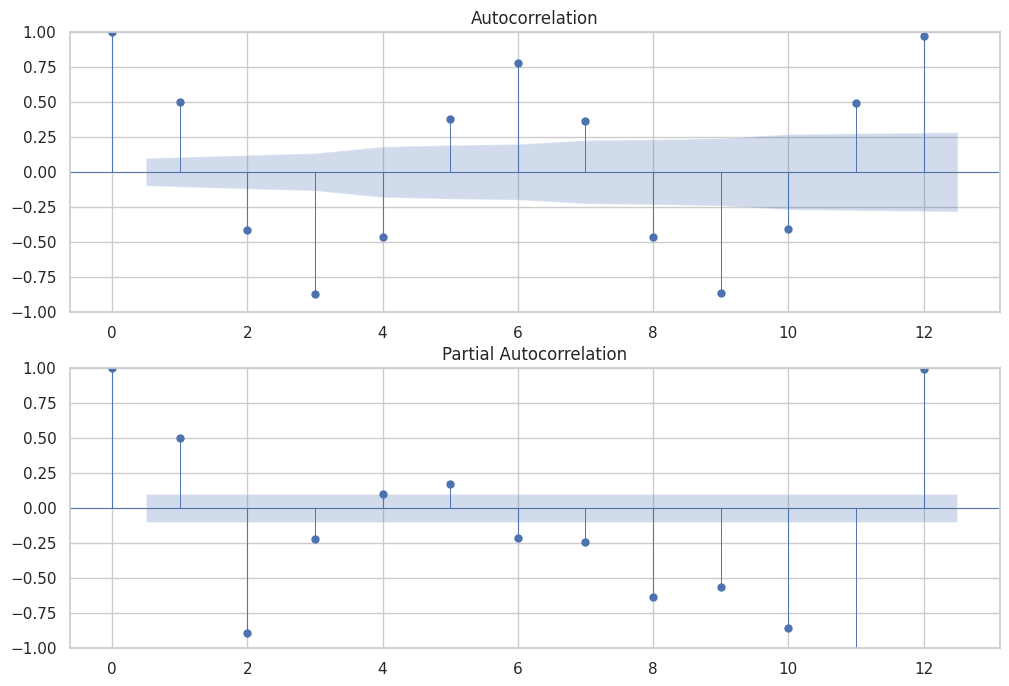

In [104]:
# P , Q order
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal,lags=12,ax=ax2)

In [ ]:
# D=0, Q=12, P= 11 (p,d,q), (P, D, Q)
# q=3(significant lag at 3 and not beyond) p=2,3, 4

In [107]:
# Split time series: train and test test
df_train = df_log[:278]
df_test = df_log[279:]

In [106]:
import statsmodels.api as sm

In [163]:
model = sm.tsa.statespace.SARIMAX(df_train['IPG2211A2N'], order=(4,1,3), seasonal_order=(10,0,12,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
forecast= results.predict(start = 279, end=397, dynamic=True)
# df[['IPG2211A2N', 'forcast']].plot(figsize=(16,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [161]:
df_a = df_log.copy(deep=True)

In [160]:
pred= results.predict(start = df_test.index[0], end = df_test.index[-1])

In [135]:
df_test['pred'] = pred.values

<ipython-input-135-8961c78bec5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred'] = pred.values


<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

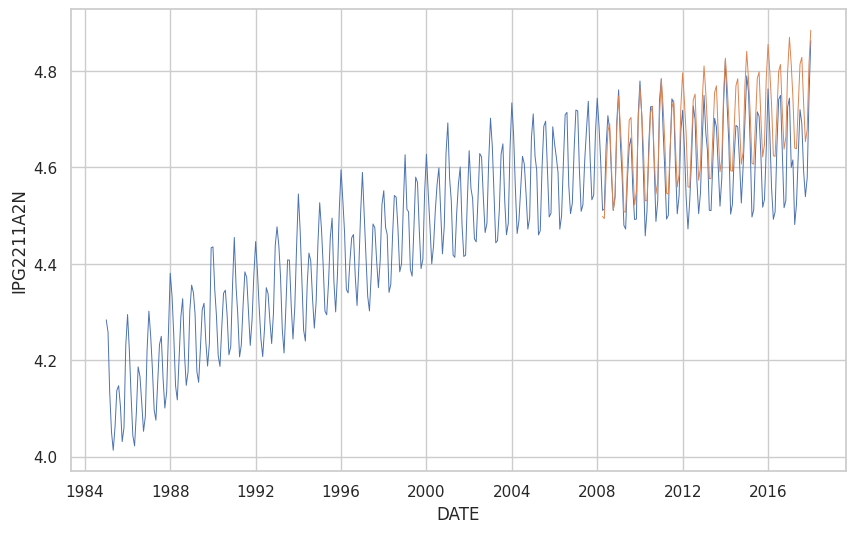

In [162]:
sns.lineplot(data = df_a, x = df_a.index, y = col)
sns.lineplot(data = df_test, x = df_test.index, y = 'pred')

In [138]:
predictions_diff_cumsum = pred.cumsum()
predictions_diff_cumsum.head()

2008-04-01     4.498116
2008-05-01     8.991938
2008-06-01    13.582611
2008-07-01    18.257617
2008-08-01    22.948323
Freq: MS, Name: predicted_mean, dtype: float64

In [152]:
predictions_log = pd.Series(df_test[col].iloc[0], index=df_test.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

DATE
2008-04-01     9.008914
2008-05-01    13.502736
2008-06-01    18.093408
2008-07-01    22.768414
2008-08-01    27.459121
dtype: float64

In [153]:
len(predictions_log)

118

In [154]:
predictions = np.exp(predictions_log)

In [ ]:
predictions.values

In [155]:
len(predictions)

118

In [156]:
df_test['predictions'] = predictions.values

<ipython-input-156-7743680c9484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions'] = predictions.values


In [159]:
df_test.head()

,IPG2211A2N,r_mean,r_std,pred,predictions
DATE,,,,,
2008-04-01,4.510798,4.622210,0.082133,4.498116,8.175634e+03
2008-05-01,4.513436,4.621461,0.083161,4.493822,7.314148e+05
2008-06-01,4.643988,4.623893,0.083375,4.590673,7.208875e+07
2008-07-01,4.707394,4.626332,0.085506,4.675006,7.730308e+09
2008-08-01,4.678109,4.621415,0.080082,4.690707,8.420633e+11


<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

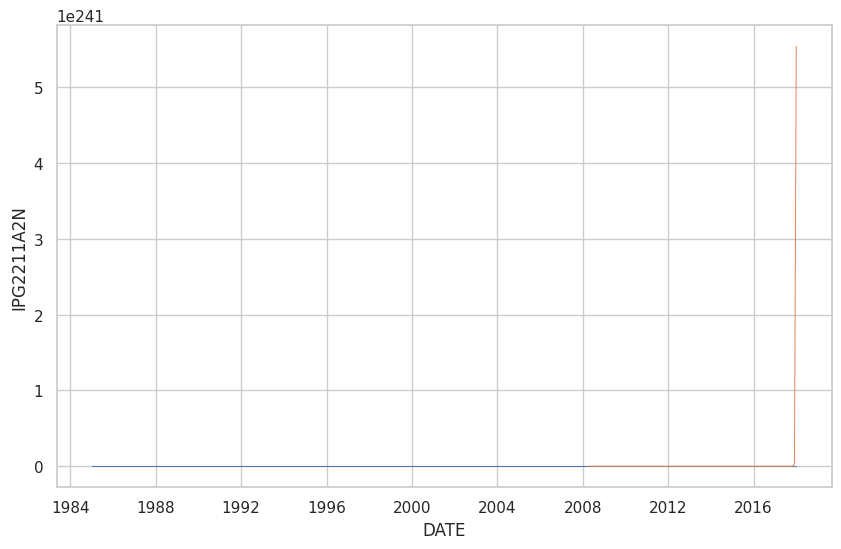

In [158]:
sns.lineplot(data = df, x = df.index, y = col)
sns.lineplot(data = df_test, x = df_test.index, y = 'predictions')

In [126]:
df['predictions'] = predictions

<Axes: xlabel='DATE'>

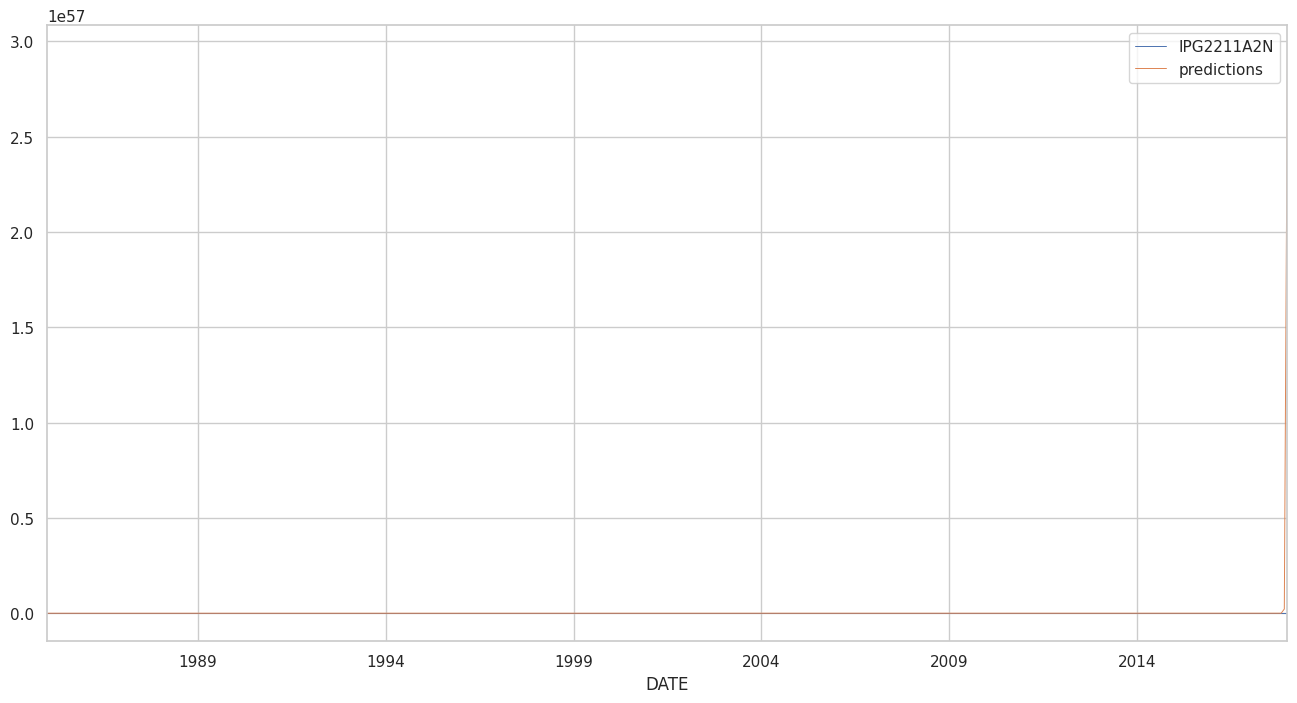

In [127]:
df[['IPG2211A2N', 'predictions']].plot(figsize=(16,8))

* Use log differenced data to plot acf, pcf and get p,q,d values'
* Split to train test values
* Use log data to sarimax and add diff factor to it and add order as found above
* plot acf, pcf curve for diff = 12 (to find P, Q, and add d=1, 12)
* reverse transform
* Find capital p, q d values

In [ ]:
# Building arima without transformation
var= 'IPG2211A2N'
df_a = df_train[[var]].copy(deep=True)
df_a['firstDiff'] = df_a[var].diff()
df_a['diff12'] = df_a[var].diff(12)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_pacf(df_a['firstDiff'].dropna(), lags=20)

In [ ]:
# p = 4 q=4 d=1

In [ ]:
plot_acf(df_a['firstDiff'].dropna(), lags=20)

In [ ]:
# now do train test split

In [ ]:
model = ARIMA(df_a[var],order=(4,1,4))
model_fit = model.fit()
prediction = model_fit.predict(start = df_test.index[0], end = df_test.index[-1])
df_a['arimaPred'] = prediction
df_a.tail()

In [ ]:
sns.lineplot(data = df_a, x = df_a.index, y = var)
sns.lineplot(data = df_test, x = df_test.index, y = 'arimaPred')


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(df_test[var], prediction))

In [ ]:
# seasonal graph
from statsmodels.tsa.statespace.sarimax import SARIMAX
# import sarimax use diff12 here
df_

In [ ]:
plot_pacf(df_a['diff12'].dropna(), lags=20)
use diff 12 data here.

In [ ]:
# above nothing in significant area so provide only seasonality

In [ ]:
model = SARIMAX(df_train[var], order=(), seasonal_order(0,0,0,12))
model_fit = model.fit()
prediction = model_fit.predict(start = df_test.index[0], end = df_test.index[-1])
df_a['sarimaxPred'] = prediction
# plot


In [ ]:
futureDate = pd.DataFrame(pd.data_range(start='1962-09-08', end='', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)

In [ ]:
# add above
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()

In [ ]:
40/7

5.714285714285714

In [ ]:
40/5

8.0

https://www.kaggle.com/code/nholloway/seasonality-and-sarimax/notebook

https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa

https://github.com/alod83/data-science/blob/master/DataAnalysis/SARIMA.ipynb